Nous allons effectuer de la segmentation de clients du site OList.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations-des-librairies" data-toc-modified-id="Importations-des-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importations des librairies</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fonctions</a></span><ul class="toc-item"><li><span><a href="#Fonctions-développées" data-toc-modified-id="Fonctions-développées-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fonctions développées</a></span></li><li><span><a href="#Fonctions-d'ACP" data-toc-modified-id="Fonctions-d'ACP-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fonctions d'ACP</a></span></li></ul></li><li><span><a href="#Importations-des-données" data-toc-modified-id="Importations-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importations des données</a></span></li><li><span><a href="#1ere-version" data-toc-modified-id="1ere-version-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1ere version</a></span><ul class="toc-item"><li><span><a href="#Traitement-des-données" data-toc-modified-id="Traitement-des-données-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Traitement des données</a></span><ul class="toc-item"><li><span><a href="#Données-manquantes" data-toc-modified-id="Données-manquantes-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Données manquantes</a></span></li><li><span><a href="#Traitements-des-dates" data-toc-modified-id="Traitements-des-dates-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Traitements des dates</a></span></li><li><span><a href="#Traitements-des-commentaires" data-toc-modified-id="Traitements-des-commentaires-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Traitements des commentaires</a></span></li><li><span><a href="#Autres-variables-qualitatives" data-toc-modified-id="Autres-variables-qualitatives-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Autres variables qualitatives</a></span></li></ul></li><li><span><a href="#ACP" data-toc-modified-id="ACP-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Kmeans</a></span></li></ul></li><li><span><a href="#2eme-version" data-toc-modified-id="2eme-version-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2eme version</a></span><ul class="toc-item"><li><span><a href="#Traitement-des-données" data-toc-modified-id="Traitement-des-données-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Traitement des données</a></span></li><li><span><a href="#ACP" data-toc-modified-id="ACP-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Kmeans</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#Segmentation-RFM" data-toc-modified-id="Segmentation-RFM-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Segmentation RFM</a></span></li></ul></div>

# Importations des librairies

In [ ]:
import pandas as pd
from sklearn import decomposition, preprocessing
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Fonctions 

## Fonctions développées

In [ ]:
def print_histogram(df_hist, list_var, ncluster, mes=""):
    """
    Affiche un groupe d'histogramme pour les clusters
    :param: df_hist: le jeu de données utilisé pour les histogrammes
    :param: list_var: la liste des variables du datafram que nous voulons afficher
    :param: nrow: le nombre d'histogrammes par ligne
    :param: ncol: le nombre d'histogrammes par colonne
    :param: mes: le message utilisé pour le titre de chaque histogramme
    """
    fig = plt.figure(figsize=(7*ncluster, len(list_var)*7))
    i = 0
    for var in list_var:
        for ind in range(ncluster):
            ax=fig.add_subplot(len(list_var),ncluster,i+1)
            df_hist[df_hist["cluster"]==ind][var].hist(ax=ax)
            ax.set_title("Clust {} : {}{}".format(ind, mes, var))
            i += 1
    fig.tight_layout()
    plt.show()


def var_proportion(list_index, list_values, printf=True, limit=0):
    """
    Affiche le classement des fréquences des valeurs des variables avec leur nombre et leur proportion 
    :param: list_index: la liste de données contenant les index
    :param: list_values: la liste de données contenant les valeurs
    :param: limit: valeur, comprise entre 0 et 1, identiquant le pourcentage des catégories à conserver 
    
    """
    nb_total = sum(list_values)
       
    if limit > 0:
        message = ""
        list_mod = []
        val = 0
        cpt = 0
        for ind, value in enumerate(list_values):
            proportion = value/nb_total*100
            if val + proportion > limit:
                break
            val += proportion
            cpt += 1
            list_mod.append(list_index[ind])
            message += "{} : {} - {:0.4f}%\n".format(list_index[ind], value, proportion)
        if print == True:
            print("Nb total de modalités : {}".format(len(list_values)))
            print("Nb modalités : {} - {:0.4f}%".format(cpt, val))    
            print(message)
        return list_mod
    else :
        print("Nb total de modalités : {}".format(len(list_values)))
        for ind, value in enumerate(list_values):
            print("{} : {} - {:0.4f}%".format(list_index[ind], value, value/nb_total*100))
            
def get_nb_components_kaiser_acp_normée(pca):
    """
    Utilise le critère de kaiser pour déterminer le nombre de composantes à retenir.
    :param: pca: l'acp préalablement établie
    """
    cpt = 0
    cpt_retenu = 0
    inertie = 0
    for eig in pca.explained_variance_:
        if eig >= 1:
            cpt_retenu += 1
            inertie += eig
        cpt += 1
        print("Composante n°{} avec une valeur propre de {:0.3f} soit {:0.3f}% de l'internie totale".format(cpt, eig, eig / pca.explained_variance_.sum() * 100))
    inertie = inertie / pca.explained_variance_.sum() * 100
    print("\nLes {} premières composantes expliquant {:0.3f}% de l'inertie totale".format(cpt_retenu, inertie))
    
def rfm_statut(df):
    if ((df['R'] == 4) and (df['F'] < 3) and (df['M'] > 2)):
        return 'Nouveau dépensier'
    elif ((df['R'] == 4) and (df['F'] < 3) and (df['M'] > 1)):
        return 'Nouveau client'
    elif ((df['R'] == 4) and (df['F'] < 3)):
        return 'Nouveau client peu dépensier'
    elif ((df['R'] == 4) and (df['F'] > 2) and (df['M'] > 2)):
        return 'Excellent client'
    elif ((df['R'] > 2) and (df['F'] > 2) and (df['M'] > 2)):
        return 'Actif dépensier'
    elif ((df['R'] > 2) and (df['F'] > 2)):
        return 'Actif'
    elif ((df['R'] > 1) and (df['R'] < 4) and (df['F'] > 2) and (df['M'] > 2)):
        return 'Moyennement actif dépensier'
    elif ((df['R'] > 1) and (df['R'] < 4) and (df['F'] > 2)):
        return 'Moyennement actif intéressant'
    elif df['R'] > 1:
        return 'Moyennement actif'
    elif ((df['R'] == 1) and (df['F'] > 2) and (df['M'] > 2)):
        return 'Ancien actif dépensier'
    elif ((df['R'] == 1) and (df['F'] > 2)):
        return 'Ancien actif'
    elif (df['R'] == 1):
        return 'Ancien'
    else:
        return 'A voir'
   
    

## Fonctions d'ACP

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()

# Importations des données

Nous récupérons les différents datasets proposés

In [ ]:
df_cli = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
df_geo = pd.read_csv('brazilian-ecommerce/olist_geolocation_dataset.csv')
df_ord = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')
df_rev = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')
df_pay = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
df_ite = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
df_pro = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')
df_sel = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')
df_cli.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df_cli[df_cli['customer_unique_id']=='00172711b30d52eea8b313a7f2cced02']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA


En se basant sur le schéma relationnel des différentes structures : 
https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv
Nous pouvons relier les clés primaires aux clés étrangères.

In [ ]:
df_merge = df_cli.merge(df_ord, how='left', on='customer_id').merge(df_rev, how='left', on='order_id').merge(df_pay, how='left', on='order_id')\
           .merge(df_ite, how='left', on='order_id').merge(df_pro, how='left', on='product_id').merge(df_sel, how='left', on='seller_id')
df_merge = df_merge.drop(columns=["customer_id", "order_id", "review_id", "order_item_id",\
                                                      "product_id", "seller_id", "seller_zip_code_prefix",\
                                                      "customer_zip_code_prefix"])
df_merge.head()

,customer_unique_id,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,861eff4711a542e4b93843c6dd7febb0,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,itaquaquecetuba,SP
1,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,5,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,itajai,SC
2,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,itaquaquecetuba,SP
3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,5,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,itaquaquecetuba,SP
4,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,5,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,ibitinga,SP


In [ ]:
len(df_merge)

119151

La taille du jeu de données est ainsi de 119 151 individus.
Regardons les fréquens des modalités des variables qualitatives.

In [ ]:
for col in df_merge.select_dtypes(include='object').columns:
    print("{} : {}".format(col, len(df_merge[col].value_counts())))

customer_unique_id : 96096
customer_city : 4119
customer_state : 27
order_status : 8
order_purchase_timestamp : 98875
order_approved_at : 90733
order_delivered_carrier_date : 81018
order_delivered_customer_date : 95664
order_estimated_delivery_date : 459
review_comment_title : 4600
review_comment_message : 36921
review_creation_date : 637
review_answer_timestamp : 99010
payment_type : 5
shipping_limit_date : 93318
product_category_name : 73
seller_city : 611
seller_state : 23


Nous observons qu'il y a énormément de modalités. Ainsi une préparation des données est nécessaire.

# 1ere version

## Traitement des données

Regardons où sont situées les données manquantes afin de choisir la statégie à adopter.

### Données manquantes

In [ ]:
df = df_merge.copy()
len(df) - df.count()

customer_unique_id                    0
customer_city                         0
customer_state                        0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542


Il y a peu de valeurs manquantes pour 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date' et les variables de type product_xxx_xxx donc nous pouvons supprimer les individus concernés.

In [ ]:
df = df[df["order_approved_at"].notna() & df["order_delivered_carrier_date"].notna() &
        df["order_delivered_customer_date"].notna() & df["product_category_name"].notna() &
        df["product_weight_g"].notna()]

In [ ]:
len(df) - df.count()

customer_unique_id                    0
customer_city                         0
customer_state                        0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
review_score                          0
review_comment_title             100409
review_comment_message            65847
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0


### Traitements des dates

Pour gérer les dates, nous allons les transformer en valeurs quantitatives. Pour cela, nous ferons une différence entre une date de référence et la date à traiter.
Pour obtenir la date de référence, regardons la date la plus récente.

In [ ]:
print(max(df['order_purchase_timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
print(max(df['order_approved_at'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
print(max(df['order_delivered_carrier_date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
print(max(df['order_delivered_customer_date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
print(max(df['review_creation_date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
print(max(df['review_answer_timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))

2018-08-29 15:00:37
2018-08-29 15:10:26
2018-09-11 19:48:28
2018-10-17 13:22:46
2018-08-31 00:00:00
2018-10-29 12:27:35


La date de référence sera donc la 1 janvier 2019. La différence entre les dates donnera une valeur correspondant au nombre de mois d'écart.

In [ ]:
NB_SEC_PER_MONTH = 3600 * 24 * 30
now = datetime(2019, 1, 1)
now

datetime.datetime(2019, 1, 1, 0, 0)

In [ ]:
df["order_purchase_timestamp"] = df["order_purchase_timestamp"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["order_approved_at"] = df["order_approved_at"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["order_delivered_carrier_date"] = df["order_delivered_carrier_date"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["order_delivered_customer_date"] = df["order_delivered_customer_date"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["order_estimated_delivery_date"] = df["order_estimated_delivery_date"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["review_creation_date"] = df["review_creation_date"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["review_answer_timestamp"] = df["review_answer_timestamp"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df["shipping_limit_date"] = df["shipping_limit_date"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))

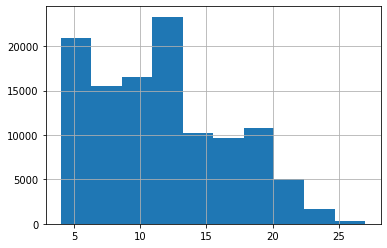

In [ ]:
df["order_purchase_timestamp"].hist()

### Traitements des commentaires

Pour les variables qualitatives relatives aux commentaires. Nous pouvons également les transformer en variables quantitatives en comptant le nombre de caractères.

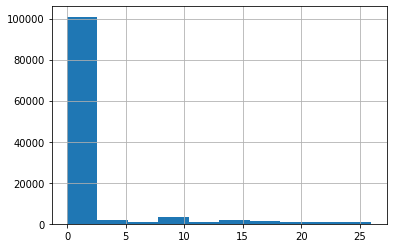

In [ ]:
df["review_comment_title"] = df["review_comment_title"].apply(lambda x : 0 if pd.isnull(x) else len(x))
df["review_comment_title"].hist()

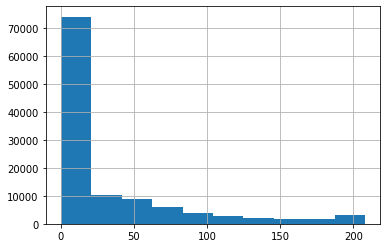

In [ ]:
df["review_comment_message"] = df["review_comment_message"].apply(lambda x : 0 if pd.isnull(x) else len(x))
df["review_comment_message"].hist()

### Autres variables qualitatives

Regardons les variables qualitatives restantes

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print("{} : {}".format(col, len(df[col].value_counts())))

customer_unique_id : 92082
customer_city : 4073
customer_state : 27
order_status : 2
payment_type : 4
product_category_name : 73
seller_city : 588
seller_state : 22


Pour les localisations, beaucoup de modalités sont présentes.
Nous n'allons conserver que les modalités représentant 75% du jeu de données afin de ne laisser plus que 5 modalités pour les états des clients et 98% pour 8 modalités pour les états de fournisseurs.

In [ ]:
list_customer_state = var_proportion(df['customer_state'].value_counts().index.tolist(),\
               df['customer_state'].value_counts().tolist(), limit=75)
print(len(list_customer_state))
print(list_customer_state)

4
['SP', 'RJ', 'MG', 'RS']


In [ ]:
df['customer_state'] = df['customer_state'].apply(lambda x : x if x in list_customer_state else "Other")
df = pd.get_dummies(df, columns=['customer_state'])

In [ ]:
list_seller_state = var_proportion(df['seller_state'].value_counts().index.tolist(),\
               df['seller_state'].value_counts().tolist(), limit=98)
print(len(list_seller_state))
print(list_seller_state)

7
['SP', 'MG', 'PR', 'RJ', 'SC', 'RS', 'DF']


In [ ]:
df['seller_state'] = df['seller_state'].apply(lambda x : x if x in list_seller_state else "Other")
df = pd.get_dummies(df, columns=['seller_state'])
df = df.drop(columns=['customer_city', 'seller_city'])

In [ ]:
list_cat = var_proportion(df['product_category_name'].value_counts().index.tolist(),\
               df['product_category_name'].value_counts().tolist(), limit=40)
print(len(list_cat))
print(list_cat)

4
['cama_mesa_banho', 'beleza_saude', 'esporte_lazer', 'moveis_decoracao']


In [ ]:
df['product_category_name'] = df['product_category_name'].apply(lambda x : x if x in list_cat else "Other")
df = pd.get_dummies(df, columns=['product_category_name'])
df = pd.get_dummies(df, columns=['order_status'])
df = pd.get_dummies(df, columns=['payment_type'])

In [ ]:
df.columns

Index(['customer_unique_id', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_installments',
       'payment_value', 'shipping_limit_date', 'price', 'freight_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_state_MG',
       'customer_state_Other', 'customer_state_RJ', 'customer_state_RS',
       'customer_state_SP', 'seller_state_DF', 'seller_state_MG',
       'seller_state_Other', 'seller_state_PR', 'seller_state_RJ',
       'seller_state_RS', 'seller_state_SC', 'seller_state_SP',
       'product_category_name_Other', 'product_category_name_beleza_saude',
       'product

## ACP

Normalisons tout d'abord les données.

In [ ]:
df = df.drop(columns='customer_unique_id')
df = df[df['payment_sequential'].notna()]
X_scaled = preprocessing.StandardScaler().fit(df.values).transform(df.values)

Nous allons maintenant réaliser l'ACP et montrer la distribution des valeurs propres de chacunes de composantes.

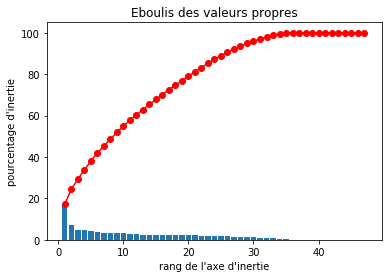

In [ ]:
pca = decomposition.PCA().fit(X_scaled)
display_scree_plot(pca)

Nous ne pouvons pas utiliser le critère de coude donc déterminons le nombre de composantes à retenir avec le critère de Kaiser.

In [ ]:
get_nb_components_kaiser_acp_normée(pca)

Composante n°1 avec une valeur propre de 8.154 soit 17.348% de l'internie totale
Composante n°2 avec une valeur propre de 3.394 soit 7.221% de l'internie totale
Composante n°3 avec une valeur propre de 2.209 soit 4.699% de l'internie totale
Composante n°4 avec une valeur propre de 2.144 soit 4.562% de l'internie totale
Composante n°5 avec une valeur propre de 2.000 soit 4.254% de l'internie totale
Composante n°6 avec une valeur propre de 1.765 soit 3.755% de l'internie totale
Composante n°7 avec une valeur propre de 1.628 soit 3.463% de l'internie totale
Composante n°8 avec une valeur propre de 1.575 soit 3.350% de l'internie totale
Composante n°9 avec une valeur propre de 1.489 soit 3.168% de l'internie totale
Composante n°10 avec une valeur propre de 1.458 soit 3.102% de l'internie totale
Composante n°11 avec une valeur propre de 1.306 soit 2.778% de l'internie totale
Composante n°12 avec une valeur propre de 1.230 soit 2.616% de l'internie totale
Composante n°13 avec une valeur prop

En utilisant le critère de Kaiser, nous pouvons retenir que les 21 premiers axes retenant 81% de l'information totale.

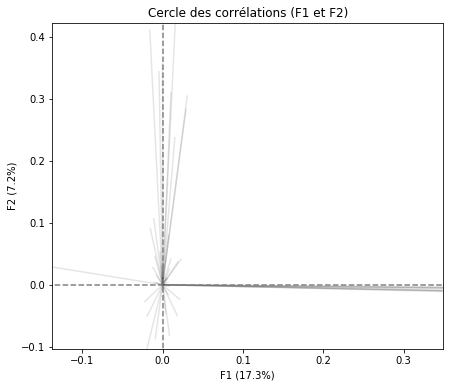

In [ ]:
n_comp = 21
display_circles(pca.components_, n_comp, pca, [(0,1)])

In [ ]:
pd.DataFrame(pca.components_[0:2,:],columns=df.columns,index = ['PC-1','PC-2'])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,...,product_category_name_beleza_saude,product_category_name_cama_mesa_banho,product_category_name_esporte_lazer,product_category_name_moveis_decoracao,order_status_canceled,order_status_delivered,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
PC-1,0.349114,0.349143,0.349146,0.348858,0.348561,0.004048,-0.137187,-0.003448,0.349047,0.348410,...,-0.019570,0.007353,0.007279,0.019652,0.008621,-0.008621,0.008642,-0.011154,-0.022730,0.018643
PC-2,-0.004108,-0.003966,-0.005931,-0.009872,-0.010838,-0.047389,0.028592,0.054120,-0.009226,-0.009075,...,-0.051338,0.004290,-0.016807,0.038334,-0.002967,0.002967,-0.082460,0.107572,-0.027471,-0.050799


Le graphique est beaucoup trop chargé de variables et donc illisible.
Nous pouvons regarder leurs contributions pour chaque composante (ici 1 et 2) en les mettant dans un dataframe.

## Kmeans

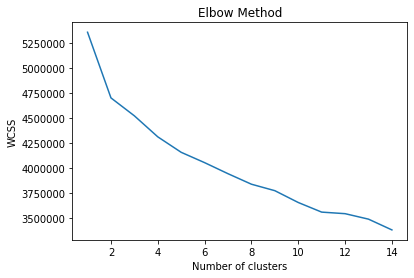

In [ ]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmean_res = KMeans(n_clusters=7, random_state=0).fit(X_scaled)
df_kmean = df.copy()
df_kmean["cluster"] = kmean_res.labels_
print_histogram(df_kmean, df_kmean.columns, 7, mes="")

Nous nous pouvons pas utiliser le critère de coude étant donné qu'il n'y a pas de pente distinctive.
En prenant 7 clusters et en regardant leurs répartitions, les données ne se distinguent pas assez. 

Conclusion : nous ne pouvons pas exploiter les données ainsi. Il est nécessaire de modifier les variables du jeu de données initial.

# 2eme version

## Traitement des données

Nous allons retenir que quelques variables qui peuvent être intéressantes et procédons les mêmes étapes que dans la version précédente

In [ ]:
df_res = df_merge.copy()
df_res = df_res.sort_values('customer_unique_id')
df_res = df_res[df_res["order_status"] == 'delivered']
df_res.columns

Index(['customer_unique_id', 'customer_city', 'customer_state', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state'],
      dtype='object')

In [ ]:
df_res = df_res.drop(columns=["order_status", "order_approved_at", "order_delivered_carrier_date",\
                              "order_delivered_customer_date","order_estimated_delivery_date",\
                              "review_creation_date", "review_answer_timestamp",\
                              "shipping_limit_date", "product_weight_g", "product_category_name",\
                              "shipping_limit_date", "product_name_lenght", "product_description_lenght",\
                              "product_photos_qty", "product_length_cm", "product_height_cm",\
                              "product_width_cm", "seller_city", "customer_city", "seller_state",\
                              "payment_type", "price","freight_value", "payment_installments"])
df_res.columns

Index(['customer_unique_id', 'customer_state', 'order_purchase_timestamp',
       'review_score', 'review_comment_title', 'review_comment_message',
       'payment_sequential', 'payment_value'],
      dtype='object')

In [ ]:
len(df_res) - df_res.count()

customer_unique_id               0
customer_state                   0
order_purchase_timestamp         0
review_score                     0
review_comment_title        101980
review_comment_message       66767
payment_sequential               3
payment_value                    3
dtype: int64

In [ ]:
df_res = df_res[df_res["payment_value"].notna()]
print(max(df_res['order_purchase_timestamp'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))

2018-08-29 15:00:37


In [ ]:
NB_SEC_PER_MONTH = 3600 * 24 * 30
now = datetime(2018, 9, 1)
df_res["order_purchase_timestamp"] = df_res["order_purchase_timestamp"].apply(
    lambda x : int((now -datetime.strptime(x, '%Y-%m-%d %H:%M:%S')).total_seconds()/NB_SEC_PER_MONTH))
df_res["comment_present"] = df_res[["review_comment_title","review_comment_message"]]\
                                    .apply(lambda x : 0 if (pd.isnull(x["review_comment_title"]) or len(x["review_comment_title"]) == 0)\
                                                         & (pd.isnull(x["review_comment_message"] or len(x["review_comment_message"]) == 0)) else 1, axis=1)
df_res = df_res.drop(columns=["review_comment_title","review_comment_message"])

Prenons un client pour observer les modifications dues aux différents traitements que nous effectuerons

In [ ]:
df_res[df_res['customer_unique_id']=='000fbf0473c10fc1ab6f8d2d286ce20c']

,customer_unique_id,customer_state,order_purchase_timestamp,review_score,payment_sequential,payment_value,comment_present
2877,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1,5,1.0,362.38,0
2875,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1,5,1.0,362.38,0
2876,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1,5,1.0,362.38,0
2874,000fbf0473c10fc1ab6f8d2d286ce20c,SP,1,5,1.0,362.38,0


payment_value = la somme des prix et des frais de transport de chaque article

Nous allons maintenant regrouper chaque information en fonction du client :

- le dernier article acheté
- la moyenne des scores donnés
- le nombre de commentaires
- la somme des paiements effectués
- le nombre d'achats passés

In [ ]:
tmp_id = df_res.iloc[0]["customer_unique_id"]
tmp_list = df_res.iloc[0]
dict_res = {}
cpt = 1
for index, row in df_res.iloc[1:].iterrows():
    if row['payment_sequential'] > 1:
        continue
    elif tmp_id == row['customer_unique_id']:
        cpt += 1
        tmp_list["order_purchase_timestamp"] = tmp_list["order_purchase_timestamp"] \
                                if tmp_list["order_purchase_timestamp"] < row['order_purchase_timestamp']\
                                else row['order_purchase_timestamp']
        tmp_list["review_score"] += row["review_score"]
        tmp_list["comment_present"] += row["comment_present"]
        tmp_list["payment_value"] += row["payment_value"]
    else:
        tmp_list["review_score"] /= cpt
        tmp_list["payment_value"] /= cpt
        tmp_list["nb_orders"] = cpt
        tmp_list["comment_present"] += 1 if row["comment_present"] > 0 else 0
        dict_res[tmp_id] = tmp_list
        tmp_id = row['customer_unique_id']
        tmp_list = row
        cpt = 1

In [ ]:
df_res = pd.DataFrame.from_dict(dict_res, orient='index').drop(columns="customer_unique_id")
df_res.head()

,customer_state,order_purchase_timestamp,review_score,payment_sequential,payment_value,comment_present,nb_orders
0000366f3b9a7992bf8c76cfdf3221e2,SP,3,5.0,1.0,141.90,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,3,4.0,1.0,27.19,0,1
0000f46a3911fa3c0805444483337064,SC,17,3.0,1.0,86.22,1,1
0000f6ccb0745a6a4b88665a16c9f078,PA,10,4.0,1.0,43.62,1,1
0004aac84e0df4da2b147fca70cf8255,SP,9,5.0,1.0,196.89,0,1


Nous notons avec notre clien témoin que les transformations effectuées sont bien cohérentes

In [ ]:
df_res[df_res.index == '000fbf0473c10fc1ab6f8d2d286ce20c']

,customer_state,order_purchase_timestamp,review_score,payment_sequential,payment_value,comment_present,nb_orders
000fbf0473c10fc1ab6f8d2d286ce20c,SP,1,5.0,1.0,362.38,1,4


In [ ]:
df_res = df_res.drop(columns=['payment_sequential', 'customer_state'])
df_res.head()

,order_purchase_timestamp,review_score,payment_value,comment_present,nb_orders
0000366f3b9a7992bf8c76cfdf3221e2,3,5.0,141.90,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,3,4.0,27.19,0,1
0000f46a3911fa3c0805444483337064,17,3.0,86.22,1,1
0000f6ccb0745a6a4b88665a16c9f078,10,4.0,43.62,1,1
0004aac84e0df4da2b147fca70cf8255,9,5.0,196.89,0,1


In [ ]:
len(df_res) - df_res.count()

order_purchase_timestamp    0
review_score                0
payment_value               0
comment_present             0
nb_orders                   0
dtype: int64

## ACP

In [ ]:
X_scaled = preprocessing.StandardScaler().fit(df_res.values).transform(df_res.values)

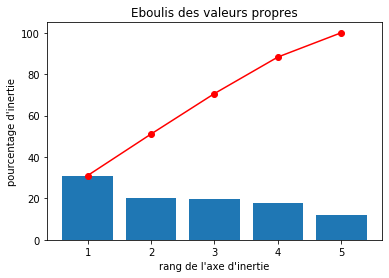

In [ ]:
pca = decomposition.PCA().fit(X_scaled)
display_scree_plot(pca)

In [ ]:
get_nb_components_kaiser_acp_normée(pca)

Composante n°1 avec une valeur propre de 1.552 soit 31.034% de l'internie totale
Composante n°2 avec une valeur propre de 1.002 soit 20.048% de l'internie totale
Composante n°3 avec une valeur propre de 0.977 soit 19.548% de l'internie totale
Composante n°4 avec une valeur propre de 0.882 soit 17.635% de l'internie totale
Composante n°5 avec une valeur propre de 0.587 soit 11.736% de l'internie totale

Les 2 premières composantes expliquant 51.081% de l'inertie totale


Nous pouvons prendre les 3 premières composantes

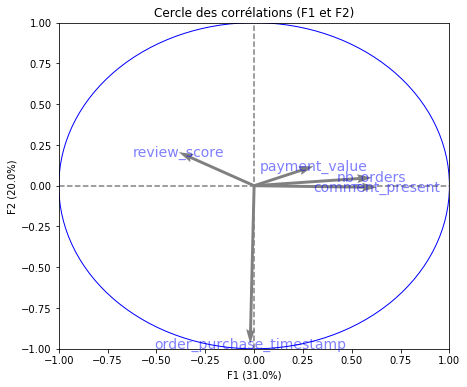

In [ ]:
n_comp = 3
display_circles(pca.components_, n_comp, pca, [(0,1)], labels = np.array(df_res.columns))

Nous observons que sur les variables payment_value, nb_orders et comment_present sont corrélées positivement à l'axe 1.Tandis que  review_score est corrélé négativement et de même pour order_purchase_timestamp pour l'axe 2.
Par conséquent, plus il y a d'achat plus le montant des achats est élevé l'est aussi, de même pour le nombre de commentaires. 

## Kmeans

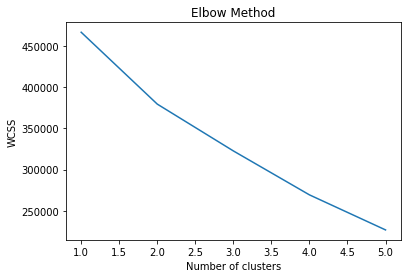

In [ ]:
wcss = []
for i in range(1, len(df_res.columns) + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, len(df_res.columns) + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Nous pouvons sélectionner 4 clusters

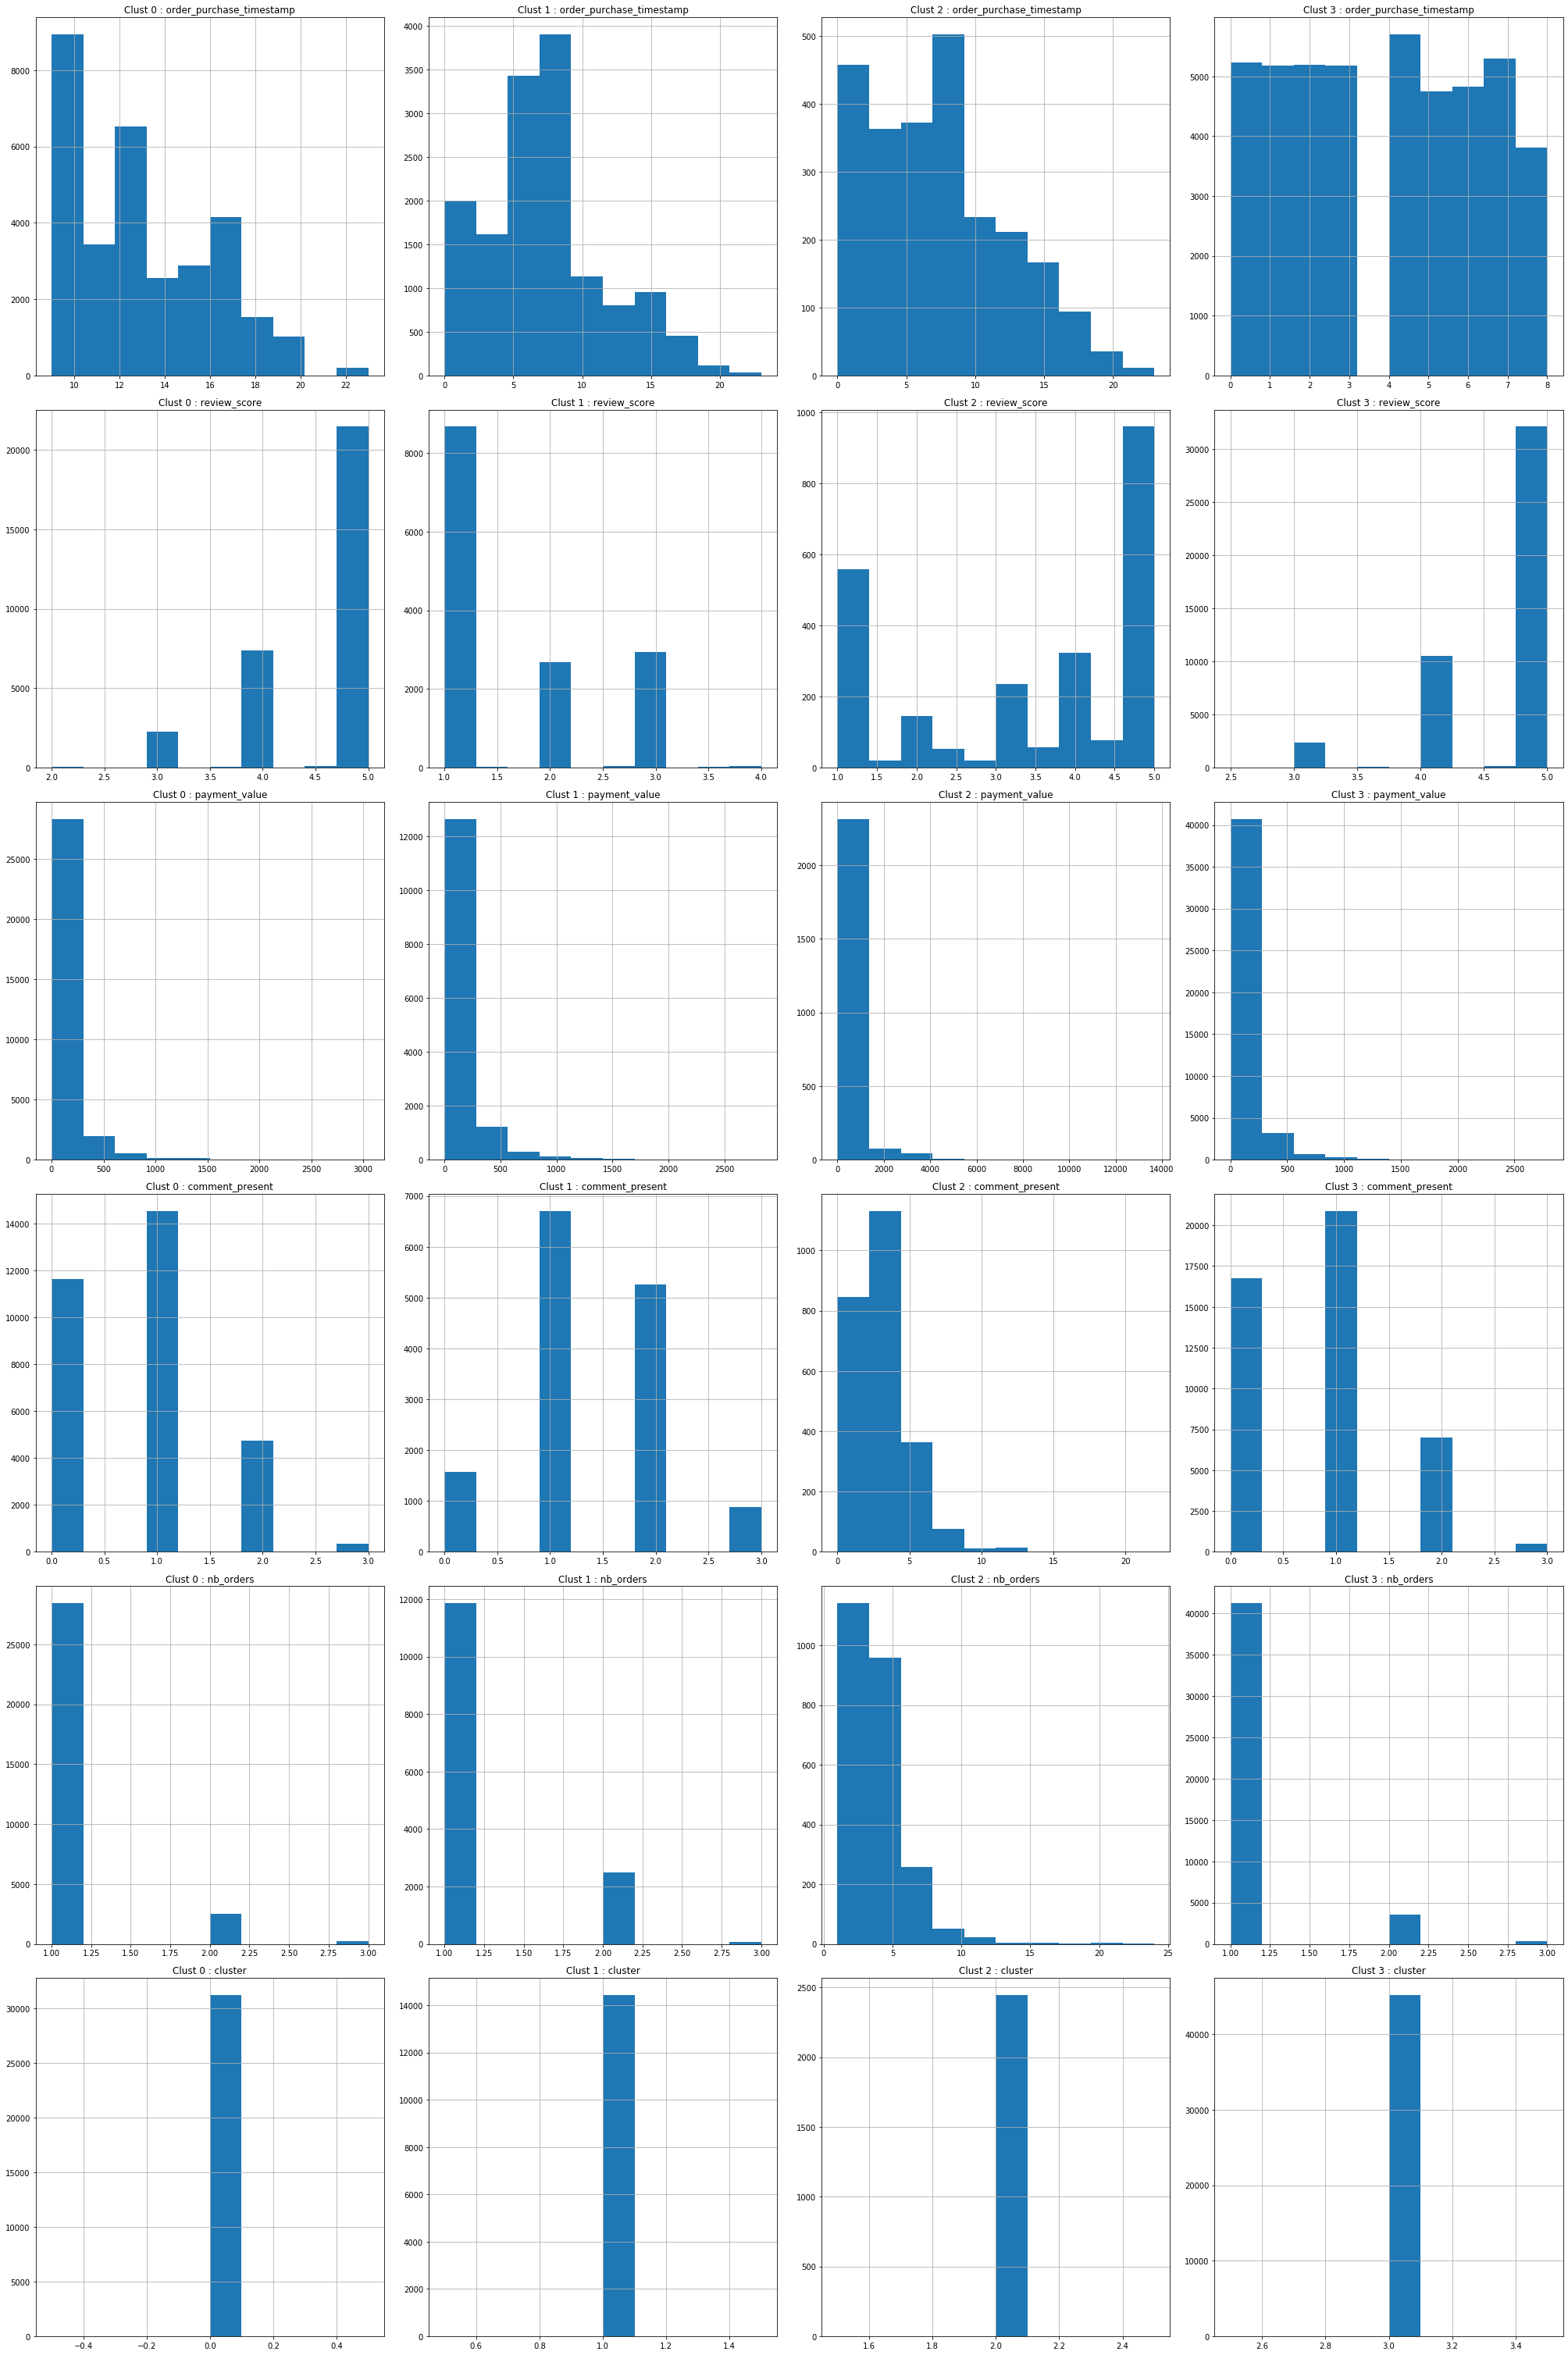

In [ ]:
kmean_res = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
df_kmean = df_res.copy()
df_kmean["cluster"] = kmean_res.labels_
print_histogram(df_kmean, df_kmean.columns, 4, mes="")

Nous observons que les clusters sont formés en fonction de différentes variables.
Par exemple le cluster 0 regroupe les clients ayant peu commenté tandis que le cluster 3 regoupe ceux qui ont bien noté les produits.

## DBSCAN

Regardons les résultats obtenus avec le BDSCAN.
Pour déterminer la valeur optimale pour le hyperparamètre eps, regardons la distributions de la distance entre 2 instances

In [ ]:
points_dist = NearestNeighbors(n_neighbors=2).fit(X_scaled)
distances, indices = points_dist.kneighbors(X_scaled)

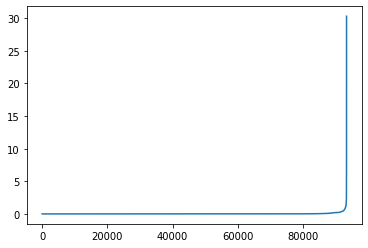

In [ ]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

(0, 1.5)

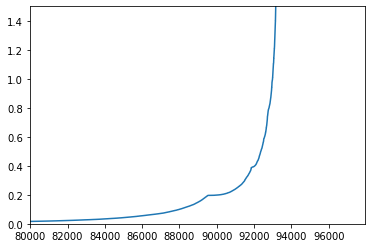

In [ ]:
plt.plot(distances[:,1])
plt.xlim(80000)
plt.ylim(0,1.5)

La meilleure valeur est environ 0.2

In [ ]:
db = DBSCAN(eps=0.2, min_samples=455).fit(X_scaled)
nb_cluster = max(db.labels_) + 1
nb_cluster

4

L'algorithme détermine 4 clusters différents.

Regardons la distribution

In [ ]:
db_list = [x if x >= 0 else nb_cluster for x in db.labels_]

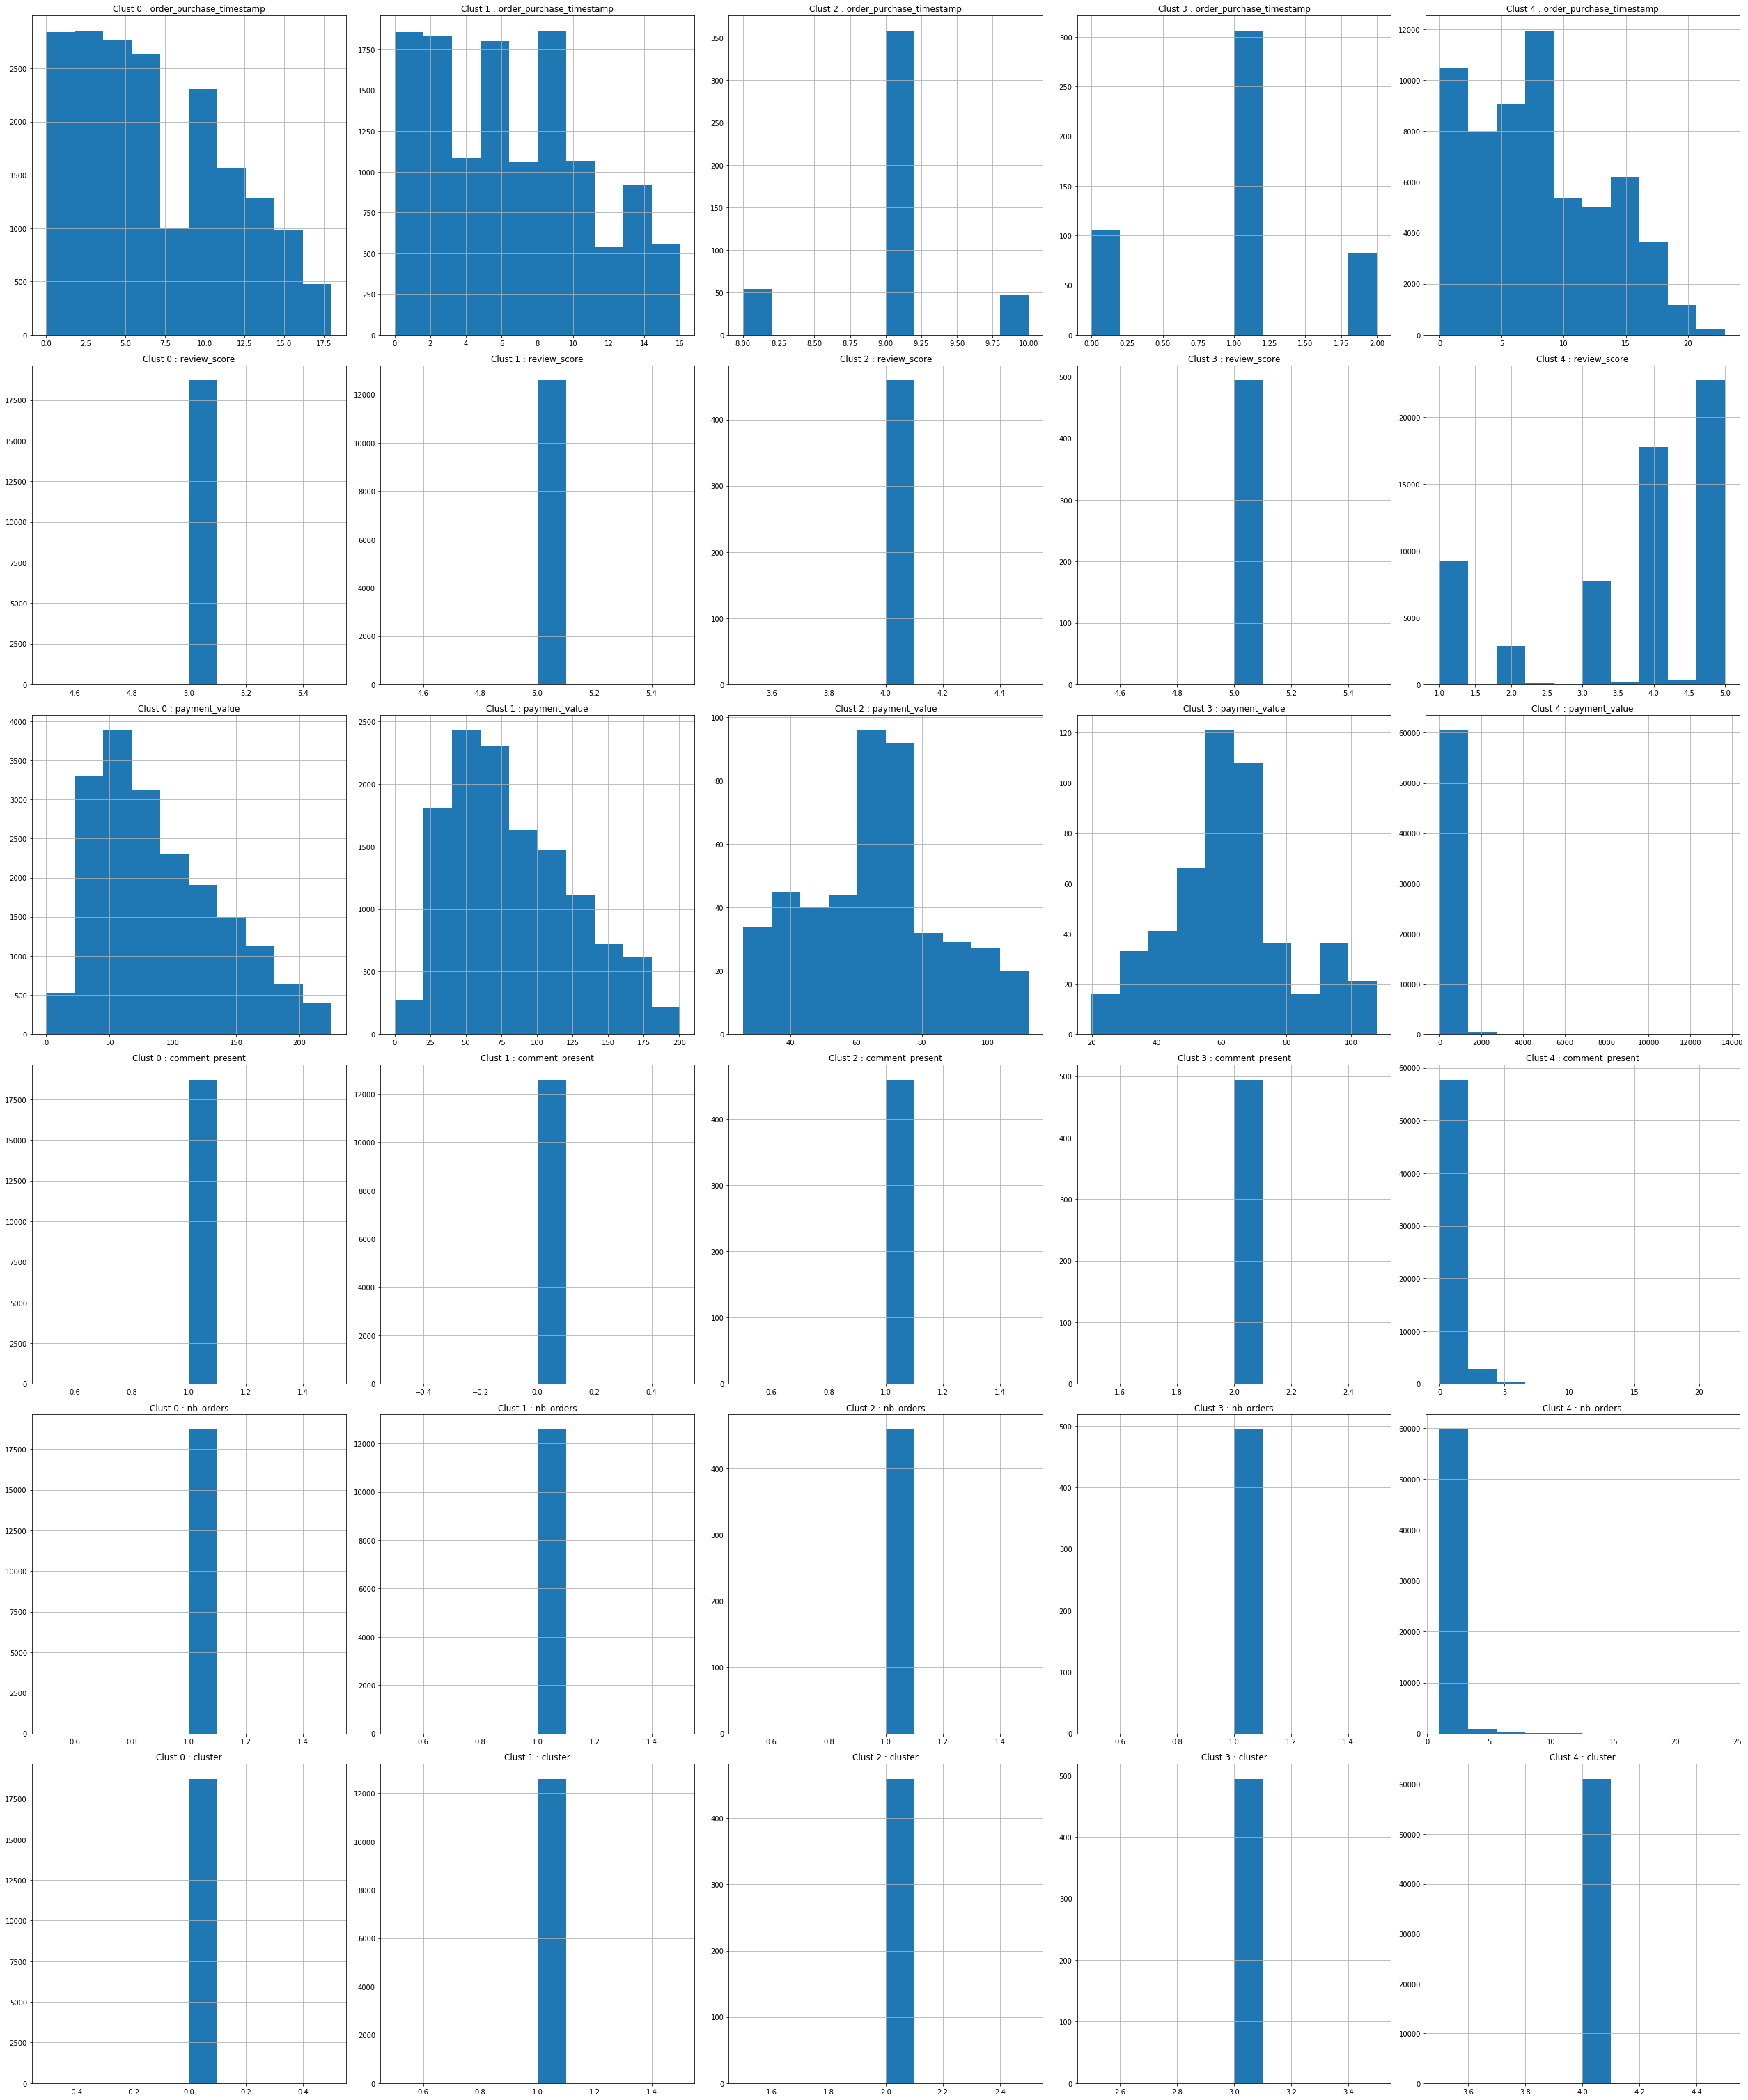

In [ ]:
df_dbscan = df_res.copy()
df_dbscan["cluster"] = db_list
print_histogram(df_dbscan, df_dbscan.columns, max(db.labels_) + 2, mes="")

Le cluster 4 représente le bruit. Les instances qui n'ont pas été pris en compte.

Nous observons par exemple que le cluster 1 est formé que de client n'ayant jamais commenté, le cluster 3 ceux qui ont effectué un dernier achat récemment.

# Segmentation RFM

Les résultats obtenus à l'aide des algorithmes de clustering ne sont pas bien convainquants.

D'un point de vue business, il est plus intéressant d'utiliser une segmantation utilisée en marketing : RFM.

Ainsi, à partir du dataset créé précédemment, nous allons conserver uniquement la récence, la fréquence et le montant.

In [ ]:
df_rfm = df_res.copy().drop(columns=['review_score','comment_present'])
df_rfm.columns = ['Recency', 'Monetary', 'Frequency']
df_rfm.head()

,Recency,Monetary,Frequency
0000366f3b9a7992bf8c76cfdf3221e2,3,141.90,1
0000b849f77a49e4a4ce2b2a4ca5be3f,3,27.19,1
0000f46a3911fa3c0805444483337064,17,86.22,1
0000f6ccb0745a6a4b88665a16c9f078,10,43.62,1
0004aac84e0df4da2b147fca70cf8255,9,196.89,1


Observons la distribution de chacune de ces trois variables

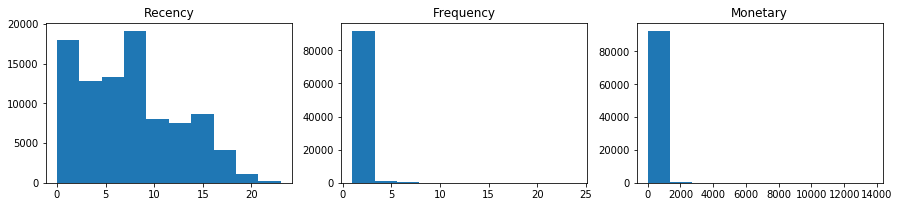

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3, 3, 1); plt.hist(df_rfm['Recency']); plt.title("Recency")
plt.subplot(3, 3, 2); plt.hist(df_rfm['Frequency']); plt.title("Frequency")
plt.subplot(3, 3, 3); plt.hist(df_rfm['Monetary']); plt.title("Monetary")
plt.show()

Pour le montant et la fréquence d'achat, la distribution se concentre autour des valeurs faibles.

Nous pouvons déjà prédire que les classes que nous formerons seront problablement mal distribuées.

A partir des quartiles, une note est attribuée avec 4 étant la meilleure et 1 la plus faible.

In [ ]:
df_rfm['R'] = pd.qcut(df_rfm['Recency'], q=4, labels=range(4,0,-1))
df_rfm['F'] = pd.cut(df_rfm['Frequency'], bins=4, labels=range(1,5))
df_rfm['M'] = pd.qcut(df_rfm['Monetary'], q=4, labels=range(1,5))

In [ ]:
df_rfm[df_rfm['F'] > 2].head()

,Recency,Monetary,Frequency,R,F,M
0f5ac8d5c31de21d2f25e24be15bbffb,9,1074.570000,18,2,3,4
11f97da02237a49c8e783dfda6f50e8e,19,783.000000,15,1,3,4
31e412b9fb766b6794724ed17a41dfa6,8,1014.020000,14,2,3,4
33176de67c05eeed870fd49f234387a0,2,467.079333,15,4,3,4
3e43e6105506432c953e165fb2acf44c,6,140.255714,14,3,3,3


En fonction de chacune de ces 3 variables, nous créons les classes.

In [ ]:
df_rfm['statut'] = df_rfm.apply(rfm_statut, axis=1)
df_rfm.head(10)

,Recency,Monetary,Frequency,R,F,M,statut
0000366f3b9a7992bf8c76cfdf3221e2,3,141.90,1,4,1,3,Nouveau dépensier
0000b849f77a49e4a4ce2b2a4ca5be3f,3,27.19,1,4,1,1,Nouveau client peu dépensier
0000f46a3911fa3c0805444483337064,17,86.22,1,1,1,2,Ancien
0000f6ccb0745a6a4b88665a16c9f078,10,43.62,1,2,1,1,Moyennement actif
0004aac84e0df4da2b147fca70cf8255,9,196.89,1,2,1,4,Moyennement actif
0004bd2a26a76fe21f786e4fbd80607f,4,166.98,1,3,1,3,Moyennement actif
00050ab1314c0e55a6ca13cf7181fecf,4,35.38,1,3,1,1,Moyennement actif
00053a61a98854899e70ed204dd4bafe,6,419.18,2,3,1,4,Moyennement actif
0005e1862207bf6ccc02e4228effd9a0,18,150.12,1,1,1,3,Ancien
0005ef4cd20d2893f0d9fbd94d3c0d97,5,129.76,1,3,1,3,Moyennement actif


In [ ]:
df_rfm[df_rfm['F'] > 2]

,Recency,Monetary,Frequency,R,F,M,statut
0f5ac8d5c31de21d2f25e24be15bbffb,9,1074.570000,18,2,3,4,Moyennement actif dépensier
11f97da02237a49c8e783dfda6f50e8e,19,783.000000,15,1,3,4,Ancien actif dépensier
31e412b9fb766b6794724ed17a41dfa6,8,1014.020000,14,2,3,4,Moyennement actif dépensier
33176de67c05eeed870fd49f234387a0,2,467.079333,15,4,3,4,Excellent client
3e43e6105506432c953e165fb2acf44c,6,140.255714,14,3,3,3,Actif dépensier
4546caea018ad8c692964e3382debd19,13,196.110000,21,1,4,4,Ancien actif dépensier
698e1cf81d01a3d389d96145f7fa6df8,12,2262.800000,20,1,4,4,Ancien actif dépensier
7582a5a77fc2976628f46a13ec91b375,4,485.940000,13,3,3,4,Actif dépensier
8d50f5eadf50201ccdcedfb9e2ac8455,0,58.618000,15,4,3,1,Actif
c402f431464c72e27330a67f7b94d4fb,6,2202.400000,20,3,4,4,Actif dépensier


Text(0.5, 1.0, 'statut')

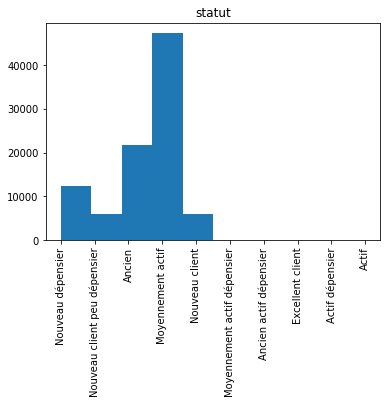

In [ ]:
plt.hist(df_rfm['statut']); plt.xticks(rotation=90); plt.title("statut")

([<matplotlib.patches.Wedge at 0x1db42f28488>,
 [Text(-0.02618979757088327, 1.0996881805781111, 'Moyennement actif'),
  Text(-0.7819715221411271, -0.7736410915665538, 'Ancien'),
  Text(0.38600679222794604, -1.0300479388620178, 'Nouveau dépensier'),
  Text(0.9100633728033339, -0.6178872530501177, 'Nouveau client peu dépensier'),
  Text(1.0782303711324146, -0.2177596536727031, 'Nouveau client'),
  Text(1.0999996406181518, -0.0008891793616306819, 'Actif dépensier'),
  Text(1.0999998596070908, -0.0005557556846692615, 'Moyennement actif dépensier'),
  Text(1.0999999494525547, -0.00033347320310458923, 'Ancien actif dépensier'),
  Text(1.0999999900116169, -0.00014823779310753563, 'Excellent client'),
  Text(1.0999999993744756, -3.709654664197818e-05, 'Actif')],
 [Text(-0.01428534412957269, 0.5998299166789697, '50.8%'),
  Text(-0.42652992116788746, -0.42198604994539296, '23.3%'),
  Text(0.21054915939706145, -0.5618443302883733, '13.3%'),
  Text(0.496398203347273, -0.3370294107546096, '6.3%'),


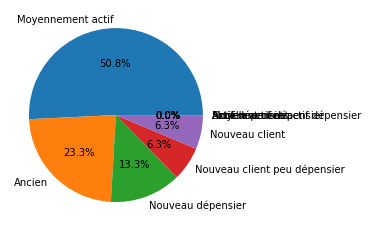

In [ ]:
plt.pie(df_rfm['statut'].value_counts().tolist(), labels=df_rfm['statut'].value_counts().index.tolist(), autopct='%1.1f%%')

Nous observons que la plupart des clients sont moyennement actifs. D'un point de vue business, il faudrait donc les relancer.